In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


In [12]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (100,100,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [13]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'sigmoid', units=2))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [15]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
       )

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
train_set = train_datagen.flow_from_directory(
        './train_set',
        target_size=(100, 100),
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory(
        './test_set',
        target_size=(100, 100),
        class_mode='categorical')

Found 100 images belonging to 2 classes.


In [21]:
model.fit_generator(
        train_set,
        epochs=10,
        validation_data=test_set)


Epoch 1/10
63/63 [==============================] - 36s 565ms/step - loss: 0.4845 - acc: 0.7614 - val_loss: 0.5146 - val_acc: 0.7500
Epoch 2/10
63/63 [==============================] - 35s 562ms/step - loss: 0.4421 - acc: 0.7919 - val_loss: 0.4659 - val_acc: 0.7850
Epoch 3/10
63/63 [==============================] - 35s 562ms/step - loss: 0.3892 - acc: 0.8229 - val_loss: 0.4965 - val_acc: 0.8000
Epoch 4/10
63/63 [==============================] - 36s 573ms/step - loss: 0.3119 - acc: 0.8713 - val_loss: 0.5028 - val_acc: 0.7750
Epoch 5/10
63/63 [==============================] - 36s 571ms/step - loss: 0.2379 - acc: 0.9058 - val_loss: 0.5985 - val_acc: 0.7850
Epoch 6/10
63/63 [==============================] - 36s 566ms/step - loss: 0.1902 - acc: 0.9261 - val_loss: 0.5704 - val_acc: 0.8100
Epoch 7/10
63/63 [==============================] - 36s 565ms/step - loss: 0.1106 - acc: 0.9613 - val_loss: 0.6959 - val_acc: 0.8250
Epoch 8/10
63/63 [==============================] - 36s 571ms/step - 

In [9]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [46]:
import cv2
import numpy as np
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('./inference/good2.jpg'
                           ,target_size =(100,100))


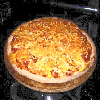

In [47]:
test_image

In [48]:
test_image = image.img_to_array(test_image)

In [49]:
test_image=test_image.reshape(1,100, 100, 3)

In [50]:
result = model.predict(test_image)

In [51]:
result=result.argmax()

In [52]:
if result == 0:
    prediction = 'Burnt_Pizza'
else:
    prediction = 'Good_Pizza'

In [53]:
prediction

'Good_Pizza'